In [1]:
import FelixSEE as FS
import os
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
FS.Utility.dirpath =  os.getcwd()
print(os.getcwd())

c:\Users\gorga\OneDrive\Documents\University\2023\Honours\Code\FelixSEE


In [3]:
source_file = os.getcwd() + "/SourceSpectra/14TeV/Pythia8/Pythia8_14TeV_521.txt"
s1 = FS.Source("B0_meson", source_file, "txt", 521, n_samples=100, preselectioncut=None)#FS.preselection_cut)


meson_arguments = {"mass" : 1, "B_meson_mass" : FS.Utility.get_mass(521), "vev" : 246.22}
Decay = FS.Two_Body_Decay("B meson decay", 521, [321, 0], FS.meson_decay, meson_arguments)

decays = {521 : [Decay]}

alp_decays = []

for pair in itertools.combinations_with_replacement(FS.lepton_masses.keys(), r=2):
    k1, k2 = pair
    label = k1 + k2
    products = [FS.lepton_ids[k1], FS.lepton_ids[k2]]
    kwargs = {"mass" : 1, "m1" : FS.lepton_masses[k1], "m2" : FS.lepton_masses[k2]}
    if k1 == k2:
        alp_decays.append(FS.Two_Body_Decay(label, 0, products, FS.diagonal_fermion_decay, kwargs, visible=False))
    #elif k1 == "e" and k2 == "mu":
    else:
        alp_decays.append(FS.Two_Body_Decay(label, 0, products, FS.off_diagonal_fermion_decay, kwargs, visible=True))
        
for quark in FS.quark_masses.keys():
    label = quark + quark
    products = [FS.quark_ids[quark], FS.quark_ids[quark]]
    kwargs = {"mass" : 1, "m1" : FS.quark_masses[quark], "m2" : FS.quark_masses[quark]}
    alp_decays.append(FS.Two_Body_Decay(label, 0, products, FS.diagonal_fermion_decay, kwargs, visible=False))

decays[0] = alp_decays
test_couplings = np.array([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2])

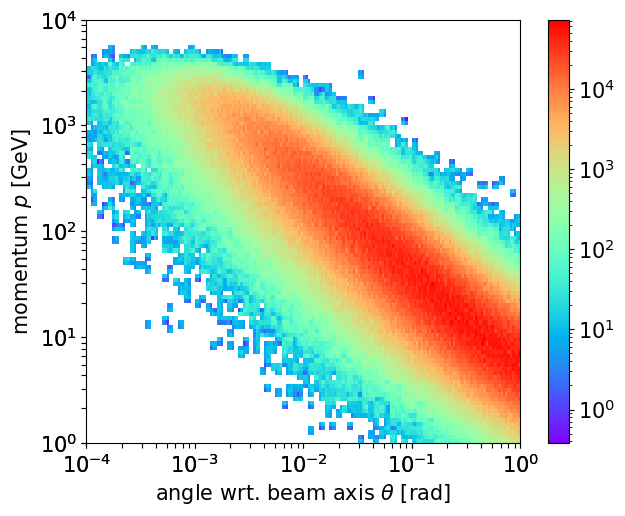

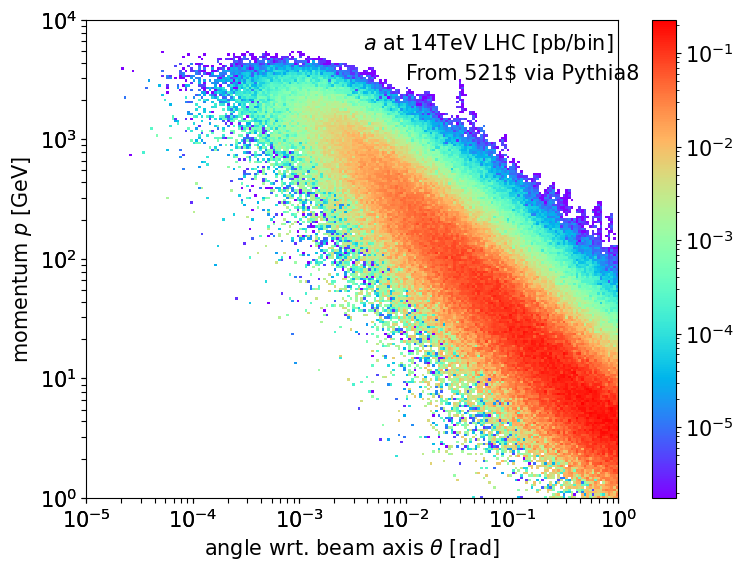

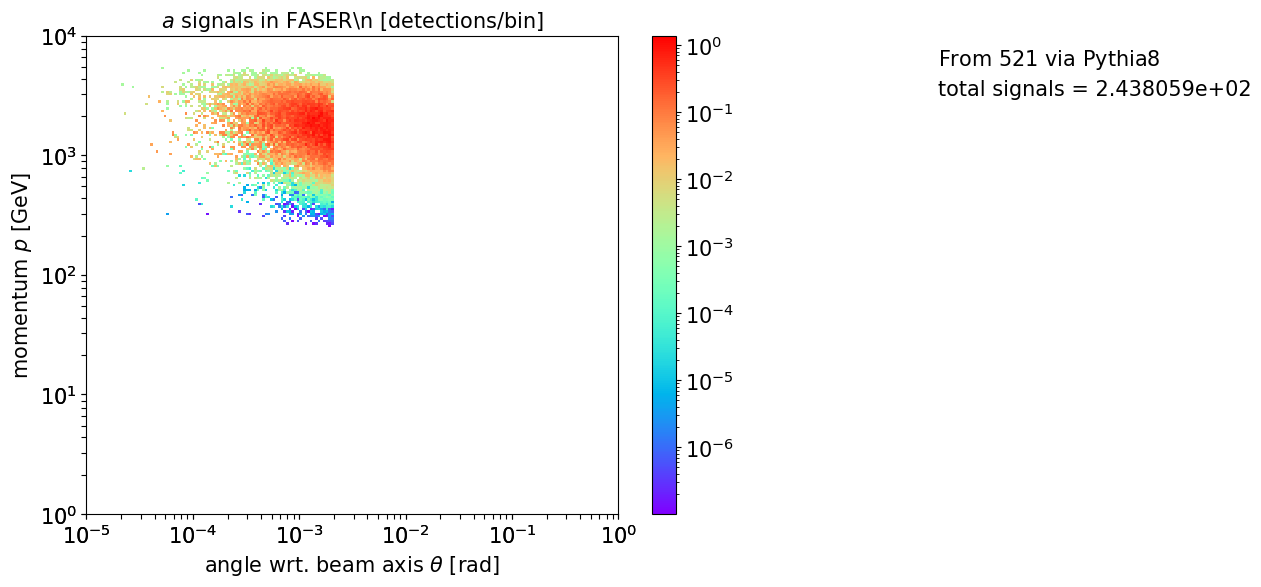

total signals: [0.00000000e+00 3.97496159e-04 3.77858952e+00 2.43805867e+02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [4]:
def FASER_GEOMETRY(momentum_vector):
    return (np.sqrt(momentum_vector.x**2 + momentum_vector.y**2) < 1)

FASER_experiment = FS.Experiment(distance=480, acceptance_function=FASER_GEOMETRY, constraint_function=None, length=5,
                              luminosity=3000, sources=[s1], decays=decays)

FASER_experiment.initialise(1, diagonal_coupling=test_couplings, off_diagonal_coupling=test_couplings, reload_sources=True)

s1.display_spectrum(prange=[[-4, 0, 200], [0,4, 100]])

n_signals, src_sigs, stat_p, stat_w = FASER_experiment.run_experiment(1, test_couplings, test_couplings, plot_LLP_spectrum=True, plot_detections=True)
print(f"total signals: {n_signals}")

#Utility.dirpath = "/Users/gorga/OneDrive/Documents/University/2023/Honours/FORESEE/FORESEE/Models/ALP-FelixCode/"

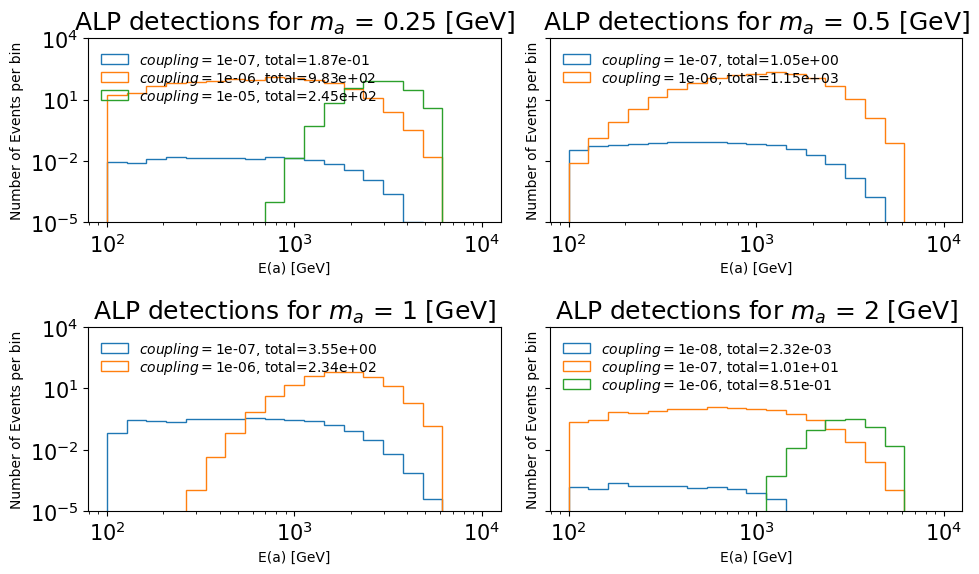

In [ ]:
couplings = np.logspace(-9, -4, 6)
n_signals = []
momenta = []
weightings = []
masses = [0.25, 0.5, 1, 2]

fig, ax = plt.subplots(2,2,figsize=(10,6), sharey=True)
i = 0
j = 0
for mass in masses:
    FASER_experiment.generate_LLP_spectrum(mass,do_save=False) #generate the appropriate reference spectrum
    counts, src_counts, stat_p, stat_w = FASER_experiment.run_experiment(mass, couplings, couplings, plot_detections=False, scale_results=2)
    if stat_w == []: continue
    for coup,weight, sig in zip(couplings, stat_w[0].T, counts):
        if np.sum(weight)<10**-3 : continue
        ax[i][j].hist(stat_p[0].t, weights=weight, bins=np.logspace(2,4, 20), histtype='step', label=r"$coupling=$"+str(coup) + ', total={:.2e}'.format(sig)) 
        ax[i][j].set_xscale("log")
        ax[i][j].set_yscale("log")
        ax[i][j].set_ylim(10**-5,10**4) 
        ax[i][j].set_xlabel("E(a) [GeV]", fontsize=10) 
        ax[i][j].set_ylabel("Number of Events per bin", fontsize=10) 
        ax[i][j].legend(frameon=False, labelspacing=0, fontsize=10, loc='upper left')
        ax[i][j].set_title(r'ALP detections for $m_a$ = {0} [GeV]'.format(mass))
    j += 1
    if j == 2:
        j = 0
        i += 1

plt.tight_layout()
plt.show()

In [6]:
LLP_sim = FS.simulation(FASER_experiment, dirpath=os.getcwd())
mass_range= np.linspace(0.1, 6, 10)
couplings = np.logspace(-9.5, -2, 20)

LLP_sim.generate_LLP_spectra(mass_range)
results = LLP_sim.vary_both_coupling(mass_range, couplings, n_samples=10)

generating LLP spectra for mass: 0.1
save data to file: c:\Users\gorga\OneDrive\Documents\University\2023\Honours\Code\FelixSEE/model/LLP_spectra/14TeV_m_0.1_511.npy
generating LLP spectra for mass: 0.7555555555555555
save data to file: c:\Users\gorga\OneDrive\Documents\University\2023\Honours\Code\FelixSEE/model/LLP_spectra/14TeV_m_0.7555555555555555_511.npy
generating LLP spectra for mass: 1.4111111111111112
save data to file: c:\Users\gorga\OneDrive\Documents\University\2023\Honours\Code\FelixSEE/model/LLP_spectra/14TeV_m_1.4111111111111112_511.npy
generating LLP spectra for mass: 2.066666666666667
save data to file: c:\Users\gorga\OneDrive\Documents\University\2023\Honours\Code\FelixSEE/model/LLP_spectra/14TeV_m_2.066666666666667_511.npy
generating LLP spectra for mass: 2.7222222222222223
save data to file: c:\Users\gorga\OneDrive\Documents\University\2023\Honours\Code\FelixSEE/model/LLP_spectra/14TeV_m_2.7222222222222223_511.npy
generating LLP spectra for mass: 3.3777777777777778


  0%|          | 0/10 [00:00<?, ?it/s]

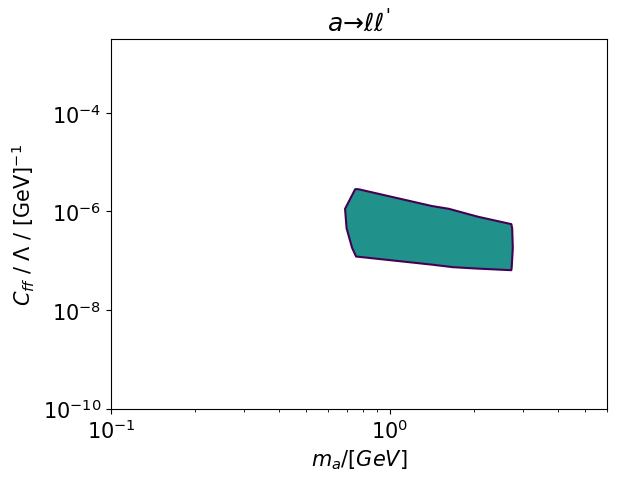

In [7]:
m = np.unique(results.T[0])
c = np.unique(results.T[1])
M, C = np.meshgrid(m,c)
values = results.T[2]
values = values.reshape((len(m), len(c)))
n = np.log10(np.array(values).T+1e-20)
plt.contour(M, C, n, levels=[np.log10(3)])
plt.contourf(M,C,n, levels=[np.log10(3),10**10])
plt.yscale("log")
plt.title(r"$a \to \ell\ell^'$")
plt.xlabel(r"$m_a / [GeV]$")
plt.ylabel(r"$C_{ff}$ / $\Lambda$ / [GeV]$^{-1}$")
plt.ylim([10**-10, 10**-2.5])
plt.xscale("log")